# Summary
---

#### This dataset will be used to predict `AQI` by training regression models.<br>

Data has been visualized, cleaned and preprocessed to increase the accuracy of prediction.<br>

Prediction of `AQI` is done with two below models:
1. Linear Regression
2. Random Forest

Hyperparameter has been tuned using `GridSearchCV` or `RandomSearchCV`. Models are evaluated using four metrics:
1. Mean Square Error
2. Rooted Mean Square Error
3. Mean Absolute Error
4. R$^2$ Error

For the final result see [Conclusion](#Conclusion) section. For the detailed process please view the whole notebook.

# Importing Libraries
___

In [2]:
# Data Libraries
import numpy as np     # Dataset handling
import pandas as pd    # Linear Algebra
import math            # Mathematical Operations

# Graphing libraries
import matplotlib.pyplot as plt # Graphing/Plotting
import seaborn as sns # Better plots

# Preprocessing Libraries
from sklearn.model_selection import train_test_split   # Train/Test Split
from sklearn.preprocessing import StandardScaler       # Data Scaling

# Modeling libraries
from sklearn.model_selection import GridSearchCV            # Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Evauation Metrics
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score
)

# Warning Library
import warnings                   # Main Library
warnings.filterwarnings("ignore") # Supressing all warnings


# Handling the data
___

## Downloading dataset from KaggleHub

In [4]:
import kagglehub

# Download latest version
file_path = kagglehub.dataset_download("youssefelebiary/global-air-quality-2023-6-cities")

print("Path to dataset files:", file_path)

Path to dataset files: /kaggle/input/global-air-quality-2023-6-cities


## Reading data

In [5]:
file_path = '/kaggle/input/global-air-quality-2023-6-cities/Air_Quality.csv'  # Adjust this path if necessary
data = pd.read_csv(file_path)

## Exploring data

In [6]:
# Display first few rows
data.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999


In [7]:
data.tail(5)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
52555,2023-12-31 19:00:00+00:00,Sydney,74.0,8.3,3.5,25.0,11.0,20.0,25.341667
52556,2023-12-31 20:00:00+00:00,Sydney,75.0,8.2,3.9,25.0,12.0,21.9,25.200003
52557,2023-12-31 21:00:00+00:00,Sydney,76.0,7.9,4.2,26.0,14.5,26.7,25.133339
52558,2023-12-31 22:00:00+00:00,Sydney,77.0,7.4,4.4,28.0,13.5,24.7,25.116669
52559,2023-12-31 23:00:00+00:00,Sydney,78.0,6.6,4.5,32.0,13.1,23.9,24.958334


In [8]:
# Descriptive statistics to understand the distribution
data.describe(include='all')

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,52560,52560,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
unique,8760,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-01-01 00:00:00+00:00,Brasilia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,8760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,273.372565,28.930514,12.051645,55.304433,18.621792,35.505850,41.941352
std,NaN,NaN,171.578815,25.473936,14.684127,36.939938,15.897499,41.866614,24.989747
min,NaN,NaN,48.000000,0.000000,0.000000,0.000000,0.000000,0.100000,8.000000
25%,NaN,NaN,160.000000,11.100000,2.500000,29.000000,7.100000,11.000000,22.638333
50%,NaN,NaN,224.000000,22.100000,5.800000,51.000000,13.400000,20.800000,32.400000
75%,NaN,NaN,335.000000,38.700000,17.300000,74.000000,24.900000,41.700000,61.013332


In [9]:
# Data Overview and Information
# Checking data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  object 
 1   City    52560 non-null  object 
 2   CO      52560 non-null  float64
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  float64
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.6+ MB


### Displaying empty rows in all columns

In [10]:
for col in data.columns:
    print(f"{col} has {data[col].isna().sum()} empty rows")

Date has 0 empty rows
City has 0 empty rows
CO has 0 empty rows
NO2 has 0 empty rows
SO2 has 0 empty rows
O3 has 0 empty rows
PM2.5 has 0 empty rows
PM10 has 0 empty rows
AQI has 0 empty rows


## Exploring data 

## Data Visualization

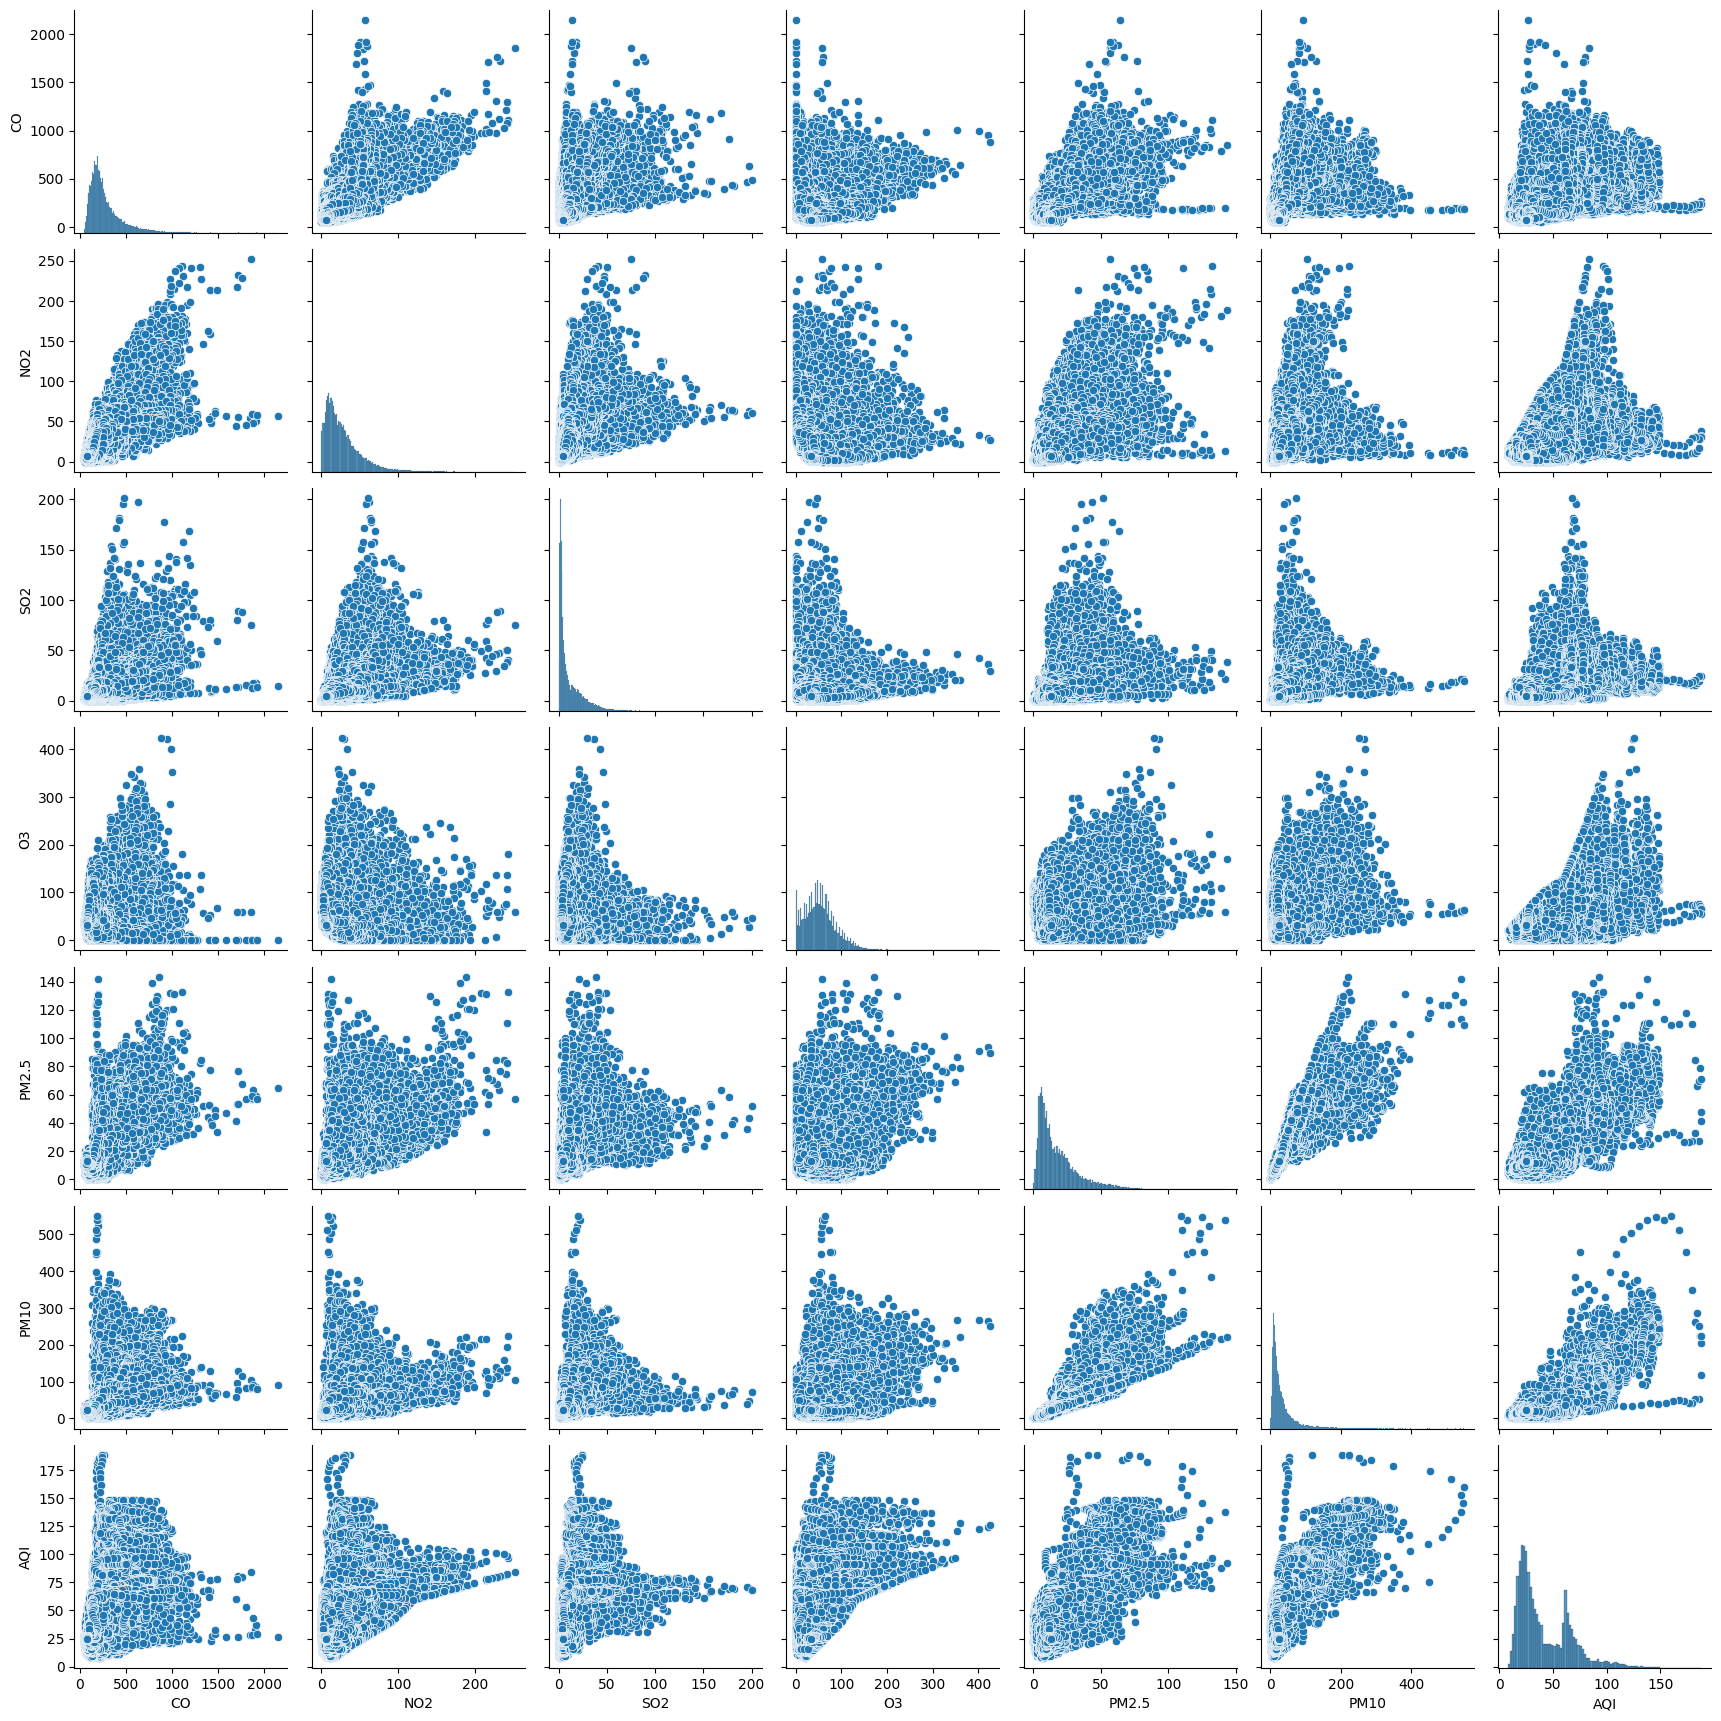

In [11]:
sns.pairplot(data)
plt.show()

### Dropping Columns

In [12]:
data.drop('Date', inplace=True, axis=1)
data.drop('City', inplace=True, axis=1)

### Finding correlation between features

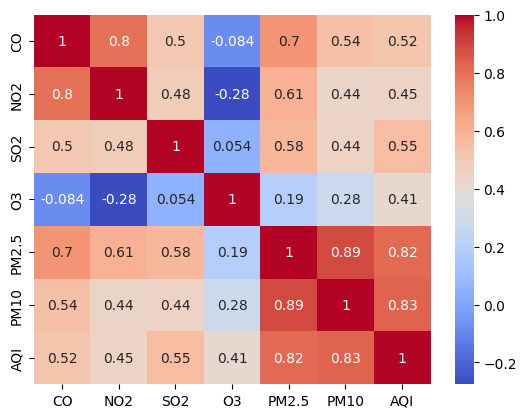

In [13]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

### Box plot

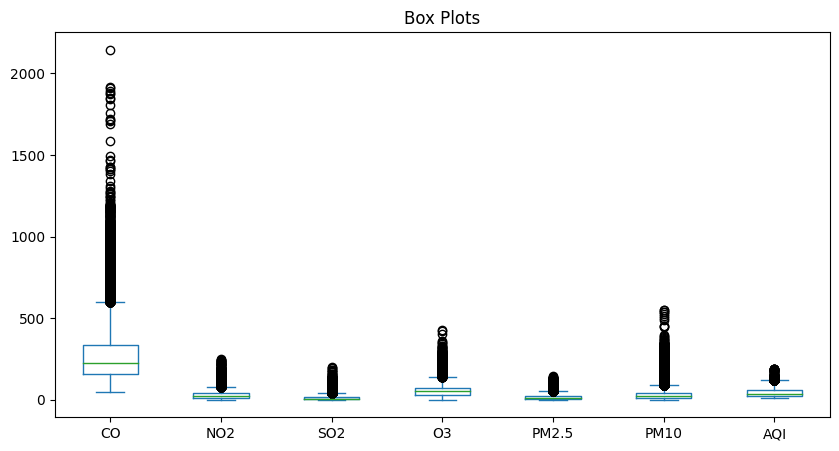

In [14]:
data.plot(kind='box', figsize=(10, 5))
plt.title('Box Plots')
plt.show()

### Skewness

In [15]:
data.skew()

CO       1.879296
NO2      2.010363
SO2      2.637683
O3       1.300437
PM2.5    1.762356
PM10     2.992383
AQI      1.167166
dtype: float64

## *Data splitting*

In [16]:
X = data.drop('AQI', axis=1)
y = data['AQI']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2, 
    random_state=42
)

### Data Scaling

In [18]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Modeling
___

## 1. Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2s = r2_score(y_test, lr_pred)

In [21]:
import math
print(f"LinearRegression MSE: {lr_mse:.4f}")
print(f"LinearRegression RMSE: {math.sqrt(lr_mse):.4f}")
print(f"LinearRegression MAE: {lr_mae:.4f}")
print(f"LinearRegression R2-Score: {lr_r2s:.4f}")

LinearRegression MSE: 128.3383
LinearRegression RMSE: 11.3286
LinearRegression MAE: 8.2409
LinearRegression R2-Score: 0.7900


## 2. Random Forest Regression

In [22]:
rf_params = {
    'n_estimators' : [250, 300, 500],
}

In [23]:
rf_cv = GridSearchCV(
    RandomForestRegressor(n_jobs=-1), 
    rf_params, 
    cv=5
).fit(X_train, y_train)

In [27]:
print(rf_cv.best_params_)    # → tells you which n_estimators performed best
print(rf_cv.best_score_)     # → shows the best cross-validated performance
print(rf_cv.best_estimator_)

{'n_estimators': 500}
0.894857373757274
RandomForestRegressor(n_estimators=500, n_jobs=-1)


In [25]:
rf = RandomForestRegressor(
    n_estimators=rf_cv.best_params_['n_estimators'],
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

## Evaluating the model

In [28]:
rf_pred = rf.predict(X_test)

In [29]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [30]:
print(f"RandomForestRegressor MSE: {rf_mse:.4f}")
print(f"RandomForestRegressor RMSE: {math.sqrt(rf_mse):.4f}")
print(f"RandomForestRegressor MAE: {rf_mae:.4f}")
print(f"RandomForestRegressor R2-Score: {rf_r2:.4f}")

RandomForestRegressor MSE: 65.3996
RandomForestRegressor RMSE: 8.0870
RandomForestRegressor MAE: 4.8728
RandomForestRegressor R2-Score: 0.8930


# Save model

In [31]:
import joblib
joblib.dump(rf_cv.best_estimator_, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [32]:
model = joblib.load('random_forest_model.pkl')
predictions = model.predict(X_test)

# Conclusion
___

### **Final Model Performance Comparison**

| Model                  | MSE         | RMSE     | MAE      | R² Score  |
|-----------------------|------------|---------|---------|-----------|
| Linear Regression     | 128.34     | 11.33   | 8.24    | 0.7900    |
| **Random Forest**     | **65.46**  | **8.09**| **4.88**| **0.8929**|

### **Key Findings**
1. **Best Performance**: **Random Forest** achieves the lowest errors (MSE: **65.51**, MAE: **4.88**) and the highest explanatory power (R²: **0.8928**).
2. **Model Comparison**:
   - **Random Forest** is the top performer, with **~49% lower MSE** and **~41% lower MAE** compared to Linear Regression.
3. **R² Consistency**: 
   - **Random Forest (0.8928) shows strong predictive power.
   - Linear models lag behind (R²: **0.7900**).

### **Optimal Model Selection**
**Random Forest** is recommended because:
- Achieves the **lowest prediction errors** (MSE, RMSE, MAE) and **highest R² score**.
- While slightly more complex than linear models, its performance justifies the choice.